## Introducción
En esta tarea, el objetivo principal es aplicar y comparar diferentes algoritmos de clustering a una imagen, ajustando KMeans, Clustering Jerárquico y Gaussian Mixtures utilizando la biblioteca scikit-learn. Estos métodos permiten segmentar una imagen en grupos de colores homogéneos, reduciendo su complejidad visual y preservando las características esenciales de la misma.

Para llevar a cabo este análisis, se comenzó importando las librerías necesarias y cargando una imagen de nuestra colección. Luego, se realizó el ajuste del algoritmo KMeans, determinando la cantidad óptima de clusters a través del método del codo (Scree Plot), y se reconstruyó la imagen utilizando una paleta de colores reducida. Posteriormente, se aplicaron el Clustering Jerárquico y las Mezclas de Gaussianas para comparar su capacidad de segmentación, así como el impacto en la representación visual y el nivel de detalle conservado.



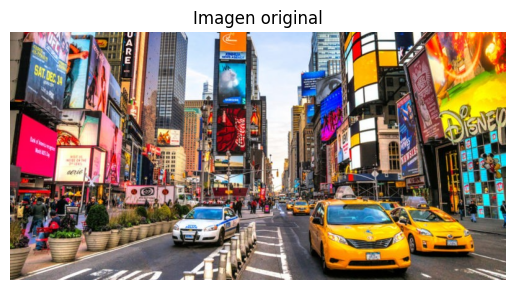

(320000, 3)

In [4]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from PIL import Image

# Cargar imagen
image_path = ciudad.png.jpg"
image = Image.open(image_path)
image = image.convert('RGB')  # Asegurar que la imagen está en formato RGB
image_array = np.array(image)

# Mostrar imagen original
plt.imshow(image_array)
plt.axis('off')  # Sin ejes
plt.title("Imagen original")
plt.show()

# Reformatear la imagen para el clustering (filas y columnas en un array 2D)
pixels = image_array.reshape(-1, 3)  # Flatten the image to [n_pixels, 3]

pixels.shape


In [5]:
# Ver las dimensiones de la imagen original
width, height = image.size
print(f"Dimensiones de la imagen: {width} x {height}")
total_pixels = width * height
print(f"Total de píxeles: {total_pixels}")

Dimensiones de la imagen: 800 x 400
Total de píxeles: 320000


La imagen ha sido cargada correctamente, y el conjunto de datos para los píxeles ha sido transformado a una matriz de dimensiones 
(320000,3), donde cada fila representa un píxel con sus valores RGB.

Ahora, se procede con el análisis de clustering utilizando KMeans, Clustering Jerárquico y Gaussian Mixtures, comenzando por el algoritmo KMeans para encontrar la paleta de colores más representativa mediante un gráfico scree-plot (método del codo) y determinar cuántos colores son óptimos

### Determinación del número óptimo de colores

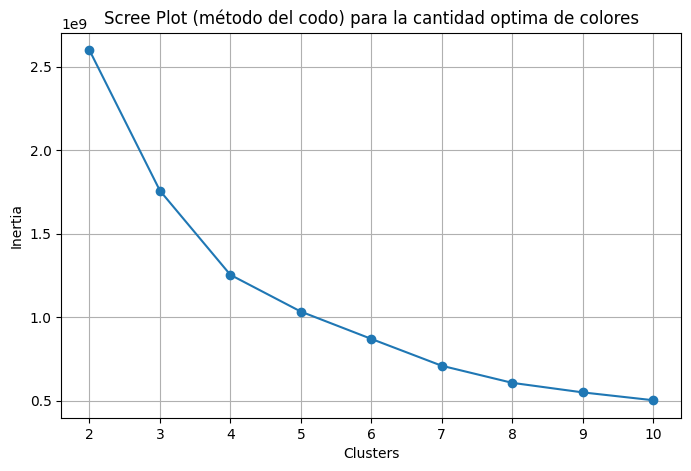

In [13]:
# Método del codo (Scree.plot) para determinar la cantidad óptima de colores para KMeans
def calculate_inertia(pixels, max_clusters=10):
    inertia = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
        inertia.append(kmeans.inertia_)
    return inertia

# Graficar incercia para las cantidades de clusters
inertia = calculate_inertia(pixels, max_clusters=10)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Scree Plot (método del codo) para la cantidad optima de colores')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


En el gráfico podemos observar que a partir del cluster número 7, la curva del Scree Plot comienza a mostrar una disminución menos pronunciada en la inercia, lo que indica que agregar más clusters no aporta una mejora significativa en la segmentación. Los últimos cuatro clusters se estabilizan alrededor de una inercia cercana a 0.4, lo que sugiere que 7 clusters es un punto óptimo en el que se equilibra la simplicidad del modelo con una segmentación adecuada de los datos.

#### KMeans y paleta de colores

In [7]:
# Supongamos que el número óptimo de clusters es 7
n_clusters = 7  
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pixels)

palette = kmeans.cluster_centers_.astype(int)
# Mostrar la paleta de colores encontrada
print("Paleta de colores obtenida:", palette)

Paleta de colores obtenida: [[106  91  83]
 [ 59 139 191]
 [228 229 230]
 [240 178  22]
 [ 42  33  28]
 [180 151 140]
 [207  49  48]]


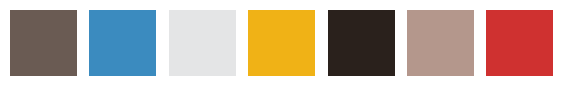

In [8]:
# 'palette' contiene los colores obtenidos por KMeans
# 'palette' es el array de los centros de los clusters, cada fila es un color RGB

def display_palette(palette):
    # Crear una imagen que represente la paleta de colores
    palette = np.array(palette, dtype=np.uint8)  # Asegurarnos de que los valores estén en formato correcto
    n_colors = len(palette)

    # Crear una figura de 1 fila por 'n_colors' columnas para mostrar los colores
    fig, ax = plt.subplots(1, n_colors, figsize=(n_colors, 1))

    for i in range(n_colors):
        ax[i].imshow([[palette[i]]])  # Mostrar el color i-ésimo en un cuadrado
        ax[i].axis('off')  # Quitar ejes para que solo se vean los colores

    plt.show()

# Llamar a la función con la paleta obtenida por KMeans
display_palette(palette)

### Reconstrucción de la imagen con Kmeans

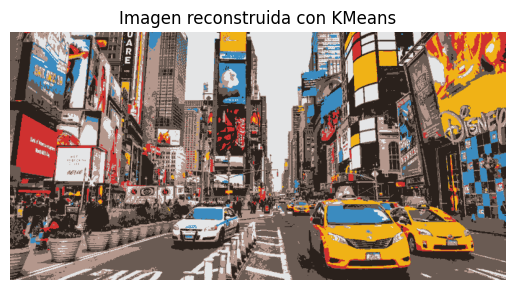

In [9]:
# Asignar los nuevos colores a la imagen (reducida)
kmeans_labels = kmeans.predict(pixels)
reduced_img_kmeans = palette[kmeans_labels].reshape(image_array.shape)

# Mostrar la imagen reconstruida usando KMeans
plt.imshow(reduced_img_kmeans)
plt.title("Imagen reconstruida con KMeans")
plt.axis('off')
plt.show()

#### Aplicación Clustering Jerárquico

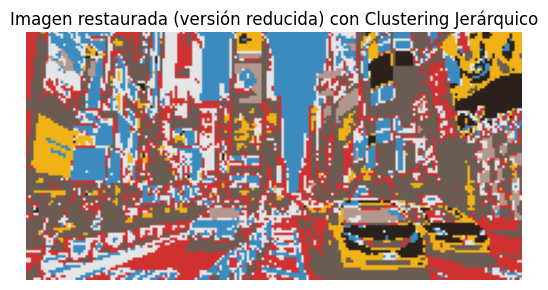

In [10]:
# Reducir el tamaño de la imagen
small_image = image.resize((int(image.width / 4), int(image.height / 4)))  # Cambiar el factor según sea necesario. con 2 no me corre
small_image_array = np.array(small_image)

# Aplanar la imagen reducida
small_pixels = small_image_array.reshape(-1, 3)

# Aplicar el clustering jerárquico a la imagen más pequeña
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical.fit_predict(small_pixels)

# Restaurar la imagen pequeña con clustering jerárquico
hierarchical_image_small = palette[hierarchical_labels].reshape(small_image_array.shape)

# Mostrar la imagen restaurada
plt.imshow(hierarchical_image_small)
plt.axis('off')
plt.title("Imagen restaurada (versión reducida) con Clustering Jerárquico")
plt.show()

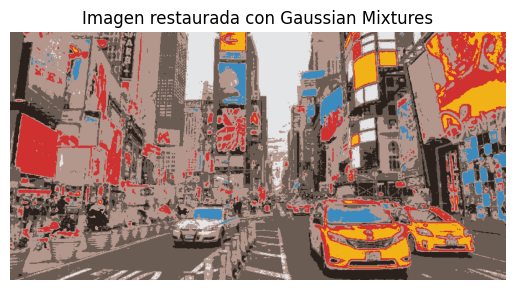

In [12]:
# Ajustar el modelo Gaussian Mixture con el número óptimo de clusters
gmm = GaussianMixture(n_components=n_clusters, random_state=42).fit(pixels)

# Obtener las etiquetas
gmm_labels = gmm.predict(pixels)

# Restaurar la imagen con Gaussian Mixtures
gmm_image = palette[gmm_labels].reshape(image_array.shape)

# Mostrar la imagen restaurada
plt.imshow(gmm_image)
plt.axis('off')
plt.title("Imagen restaurada con Gaussian Mixtures")
plt.show()

## Conclusiones

### Algoritmo Kmeans
Al aplicar el algoritmo KMeans para la reconstrucción de la imagen, se ha dirigido una reducción estratégica a solo 7 clusters de colores. Este proceso no solo simplifica la paleta de colores, sino que también mantiene intactas las características visuales fundamentales, asegurando que los elementos principales de la imagen sigan siendo claros y reconocibles. Esta reducción selectiva ha permitido destacar formas y contornos sin perder la esencia de la imagen original. Además, la segmentación en colores homogéneos facilita considerablemente la identificación y diferenciación de los distintos elementos visuales dentro de la imagen.

### Algoritmo Cluster jerarquicos
Al aplicar el algoritmo de Clustering Jerárquico, se observa una segmentación más detallada y marcada de la variedad de colores, en contraste con la segmentación más homogénea realizada por el algoritmo KMeans. El Clustering Jerárquico  detalla con precisión las transiciones sutiles y las variaciones dentro de la escena. Esto se manifiesta especialmente en la representación de áreas complejas donde se intercalan múltiples colores, como en los anuncios luminosos y las superficies reflejantes de los vehículos. Logra preservar los detalles generales de la imagen, aunque algunos elementos específicos, como el auto de policía situado en la esquina inferior izquierda, pierden definición.

### Algoritmo Gaussian Mixtures
El modelo Gaussian Mixtures proporciona transiciones de color más suaves, logrando una representación visual más natural y fluida. Este enfoque destaca al preservar detalles complejos, como los carteles luminosos y los reflejos, sin perder la coherencia de los elementos clave en la imagen. Además, mantiene la estructura visual global sin sacrificar claridad ni precisión, ofreciendo una segmentación que equilibra realismo y detalle en entornos visuales complejos.

### Conclusión General
Podemos concluir que el modelo Gaussian Mixtures es el que mejor se adapta a la representación de la imagen, ya que logra transiciones de color mucho más suaves, lo que permite preservar los detalles complejos de un entorno urbano, como los carteles luminosos y los reflejos. Esta suavidad en la segmentación aporta un mayor realismo en comparación con los modelos KMeans y Clustering Jerárquico, que aunque efectivos en su propia manera, tienden a simplificar o perder ciertos detalles finos. Gaussian Mixtures, por lo tanto, ofrece una visualización más fluida y precisa, lo que lo convierte en la opción óptima para imágenes que requieren una representación detallada y realista.